<a href="https://colab.research.google.com/github/michuishaan07/PowerBi-Projects/blob/main/banking-dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:

df = pd.read_excel('/content/Banking.xlsx')


In [ ]:
df.head(5)


,Client ID,Name,Age,Location ID,Joined Bank,Banking Contact,Nationality,Occupation,Fee Structure,Loyalty Classification,...,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
0,IND81288,Raymond Mills,24,34324,2019-05-06,Anthony Torres,American,Safety Technician IV,High,Jade,...,1.485829e+06,6.036179e+05,607332.455240,12249.9584,1.134475e+06,1,2,1,1,1
1,IND65833,Julia Spencer,23,42205,2001-12-10,Jonathan Hawkins,African,Software Consultant,High,Jade,...,6.414828e+05,2.295214e+05,344635.157402,61162.3089,2.000526e+06,1,3,2,1,2
2,IND47499,Stephen Murray,27,7314,2010-01-25,Anthony Berry,European,Help Desk Operator,High,Gold,...,1.033402e+06,6.526747e+05,203054.348179,79071.7794,5.481376e+05,1,3,3,2,3
3,IND72498,Virginia Garza,40,34594,2019-03-28,Steve Diaz,American,Geologist II,Mid,Silver,...,1.048157e+06,1.048157e+06,234685.019326,57513.6520,1.148402e+06,0,4,4,1,4
4,IND60181,Melissa Sanders,46,41269,2012-07-20,Shawn Long,American,Assistant Professor,Mid,Platinum,...,4.877825e+05,4.466442e+05,128351.452320,30012.1360,1.674412e+06,0,3,1,2,5


In [ ]:
df.shape


(3000, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Client ID                 3000 non-null   object        
 1   Name                      3000 non-null   object        
 2   Age                       3000 non-null   int64         
 3   Location ID               3000 non-null   int64         
 4   Joined Bank               3000 non-null   datetime64[ns]
 5   Banking Contact           3000 non-null   object        
 6   Nationality               3000 non-null   object        
 7   Occupation                3000 non-null   object        
 8   Fee Structure             3000 non-null   object        
 9   Loyalty Classification    3000 non-null   object        
 10  Estimated Income          3000 non-null   float64       
 11  Superannuation Savings    3000 non-null   float64       
 12  Amount of Credit Car

In [ ]:
#Generating  Descriptive Statistics for the dataset
df.describe()

,Age,Location ID,Joined Bank,Estimated Income,Superannuation Savings,Amount of Credit Cards,Credit Card Balance,Bank Loans,Bank Deposits,Checking Accounts,Saving Accounts,Foreign Currency Account,Business Lending,Properties Owned,Risk Weighting,BRId,GenderId,IAId
count,3000.000000,3000.000000,3000,3000.000000,3000.000000,3000.000000,3000.000000,3.000000e+03,3.000000e+03,3.000000e+03,3.000000e+03,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,51.039667,21563.323000,2010-08-15 00:03:21.600000,171305.034094,25531.599673,1.463667,3176.206780,5.913862e+05,6.715602e+05,3.210929e+05,2.329084e+05,29883.529774,8.667598e+05,1.518667,2.249333,2.559333,1.504000,10.425333
min,17.000000,12.000000,1995-01-03 00:00:00,15919.475400,1482.030000,1.000000,1.174800,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,44.998400,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000
25%,34.000000,10803.500000,2004-04-01 18:00:00,82906.594300,12513.775000,1.000000,1236.633525,2.396281e+05,2.044004e+05,1.199475e+05,7.479441e+04,11916.546400,3.748251e+05,1.000000,1.000000,2.000000,1.000000,5.000000
50%,51.000000,21129.500000,2011-02-18 00:00:00,142313.479600,22357.355000,1.000000,2560.800750,4.797934e+05,4.633165e+05,2.428157e+05,1.640866e+05,24341.187200,7.113147e+05,2.000000,2.000000,3.000000,2.000000,10.000000
75%,69.000000,32054.500000,2017-12-24 06:00:00,242290.306650,35464.740000,2.000000,4522.633050,8.258130e+05,9.427546e+05,4.348749e+05,3.155750e+05,41966.390700,1.185110e+06,2.000000,3.000000,3.000000,2.000000,15.000000
max,85.000000,43369.000000,2021-12-31 00:00:00,522330.259200,75963.900000,3.000000,13991.994000,2.667557e+06,3.890598e+06,1.969923e+06,1.724118e+06,124704.866000,3.825962e+06,3.000000,5.000000,4.000000,2.000000,22.000000
std,19.854760,12462.273017,NaN,111935.808260,16259.950770,0.676387,2497.094724,4.575570e+05,6.457169e+05,2.820796e+05,2.300078e+05,23109.924007,6.412303e+05,1.102145,1.131191,1.007713,0.500067,5.988242


Here we create three bins and categorize then and create a new col in our dataframe

In [ ]:
import pandas as pd

bins = [0, 100000, 300000, float('inf')]
labels = ['Low', 'Med', 'High']

df['Income Band'] = pd.cut(df['Estimated Income'], bins=bins, labels=labels)


<Axes: xlabel='Income Band'>

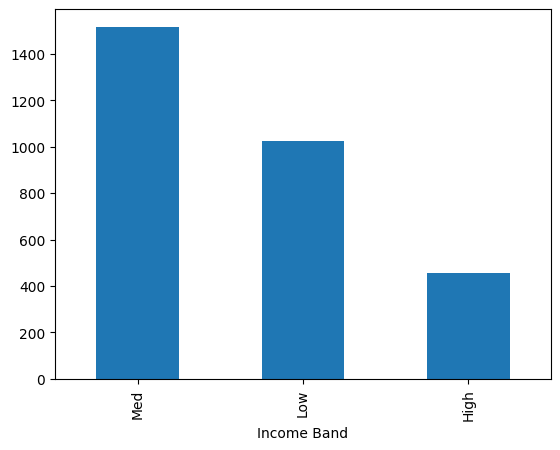

In [ ]:
df["Income Band"].value_counts().plot(kind="bar")

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = df[[
    "IAId", "BRId", "GenderId", "Amount of Credit Cards", "Nationality",
    "Occupation", "Fee Structure", "Loyalty Classification",
    "Properties Owned", "Risk Weighting", "Income Band"
]]

for col in categorical_cols.columns:
    print(f"Value Counts for {col}:")
    display(df[col].value_counts())


Value Counts for IAId:


,count
IAId,
1,177
2,177
3,177
4,177
8,177
9,176
13,176
12,176
10,176


Value Counts for BRId:


,count
BRId,
3,1352
1,660
2,495
4,493


Value Counts for GenderId:


,count
GenderId,
2,1512
1,1488


Value Counts for Amount of Credit Cards:


,count
Amount of Credit Cards,
1,1922
2,765
3,313


Value Counts for Nationality:


,count
Nationality,
European,1309
Asian,754
American,507
Australian,254
African,176


Value Counts for Occupation:


,count
Occupation,
Associate Professor,28
Structural Analysis Engineer,28
Recruiter,25
Account Coordinator,24
Human Resources Manager,24
...,...
Office Assistant IV,8
Automation Specialist I,7
Computer Systems Analyst I,6


Value Counts for Fee Structure:


,count
Fee Structure,
High,1476
Mid,962
Low,562


Value Counts for Loyalty Classification:


,count
Loyalty Classification,
Jade,1331
Silver,767
Gold,585
Platinum,317


Value Counts for Properties Owned:


,count
Properties Owned,
2,777
1,776
3,742
0,705


Value Counts for Risk Weighting:


,count
Risk Weighting,
2,1222
1,836
3,460
4,322
5,160


Value Counts for Income Band:


,count
Income Band,
Med,1517
Low,1027
High,456


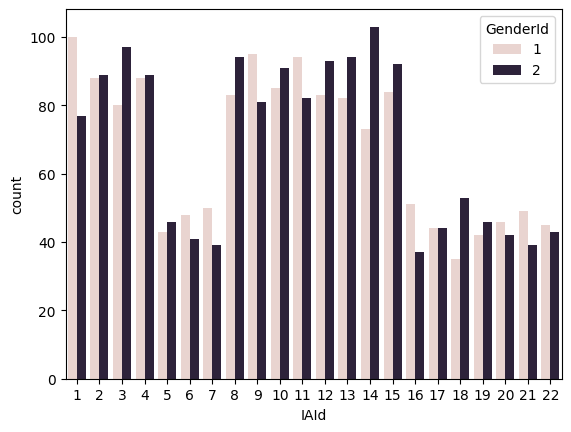

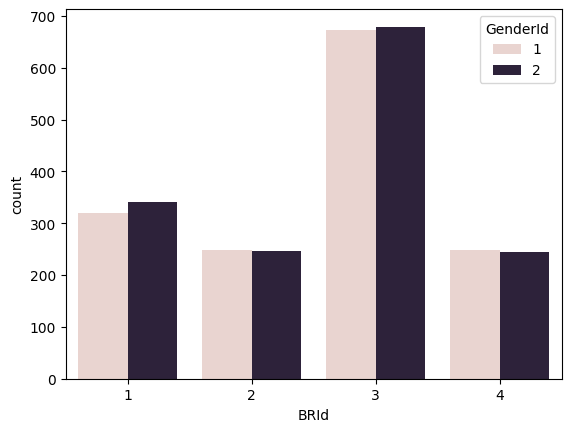

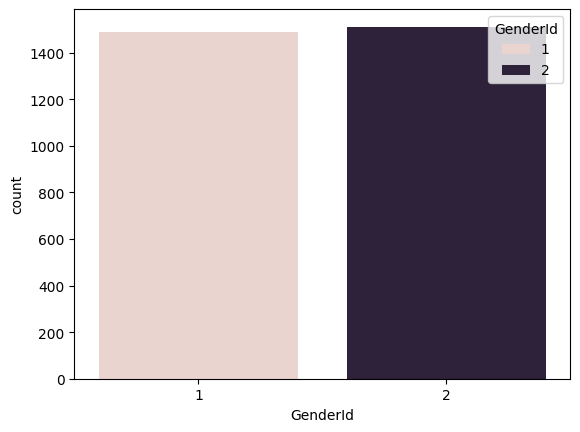

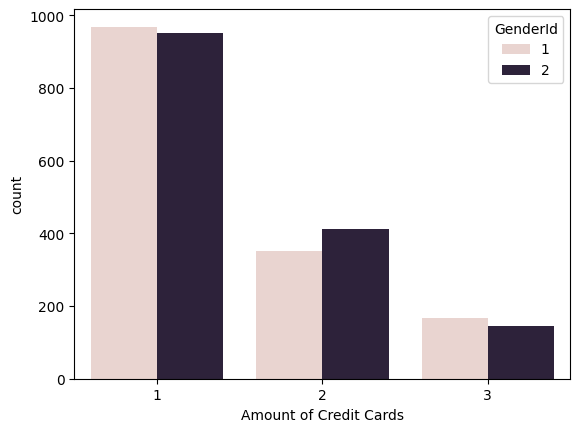

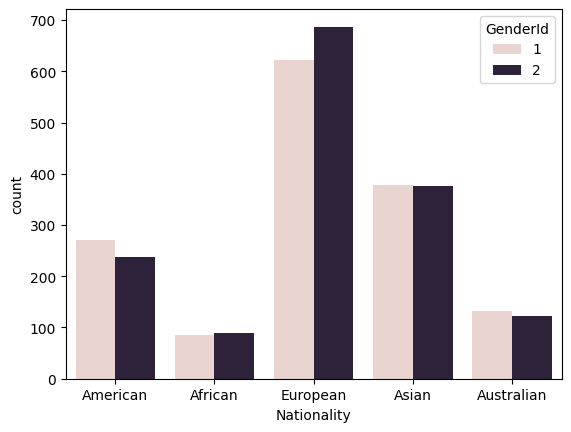

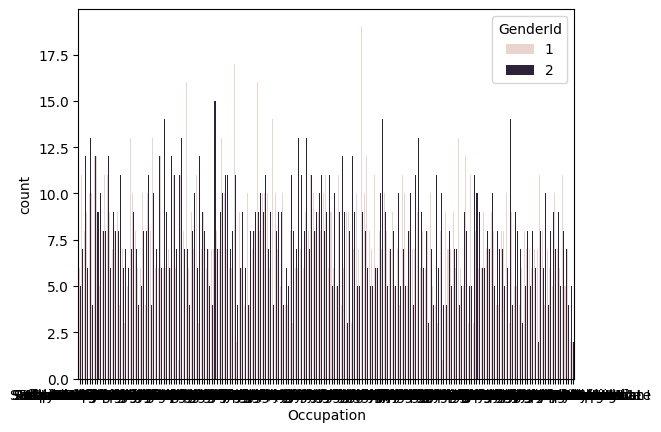

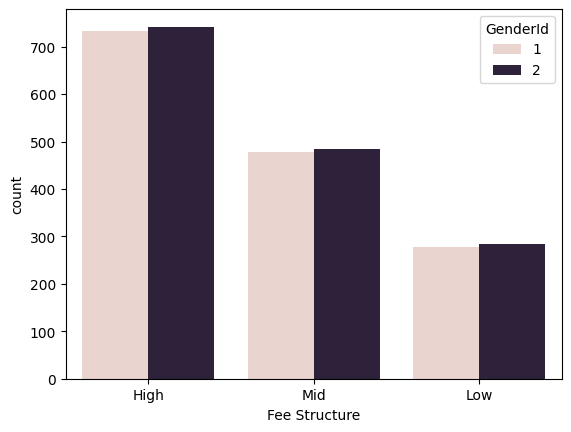

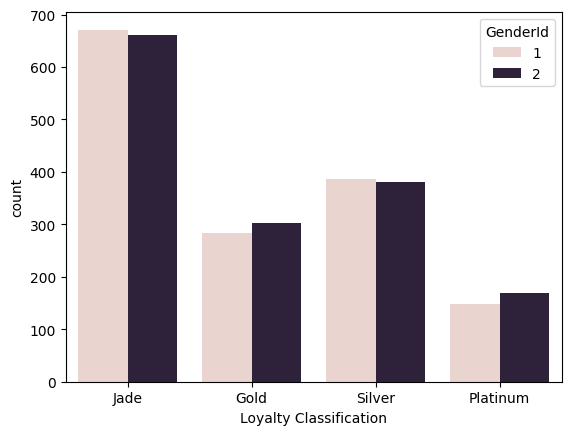

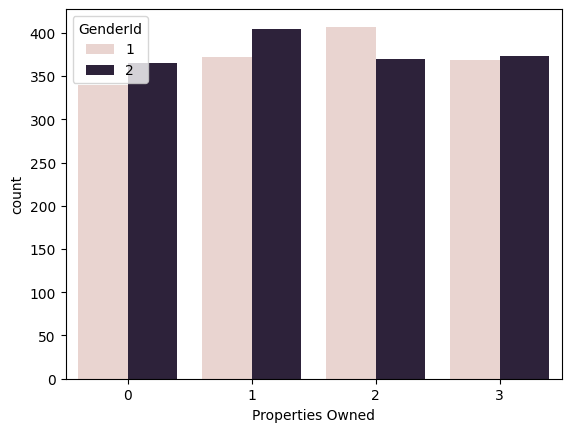

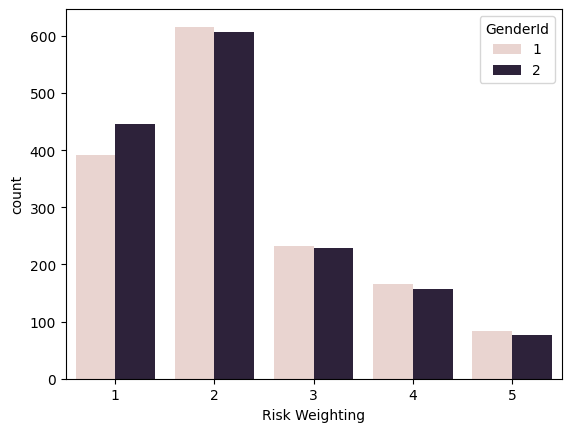

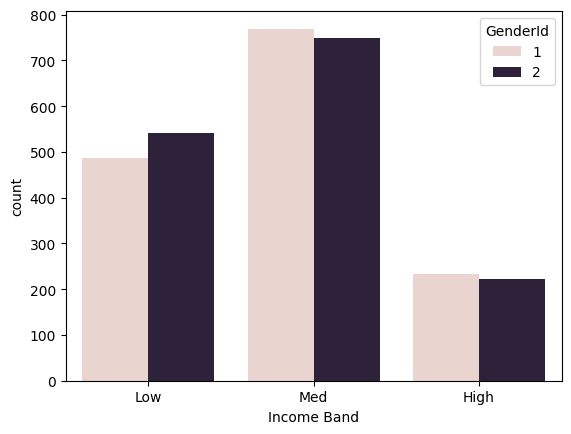

In [ ]:
for i,predictor in enumerate(df[[ "IAId", "BRId", "GenderId", "Amount of Credit Cards", "Nationality",
    "Occupation", "Fee Structure", "Loyalty Classification",
    "Properties Owned", "Risk Weighting", "Income Band"]]):
     plt.figure(i)
     sns.countplot(data=df,x=predictor,hue="GenderId")

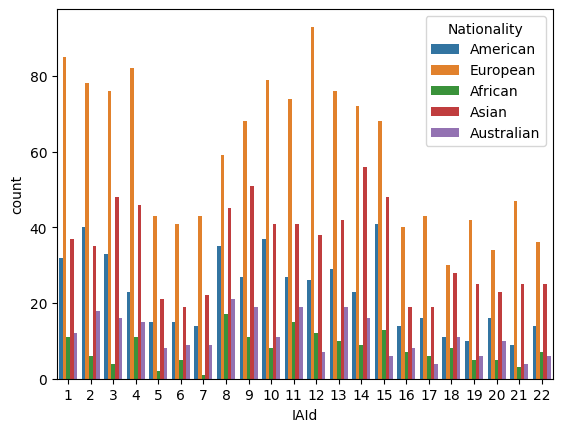

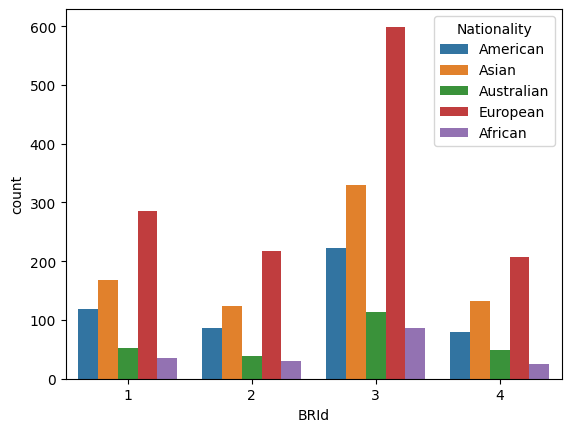

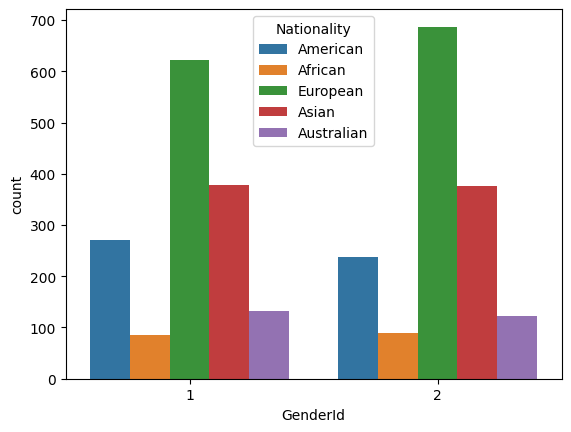

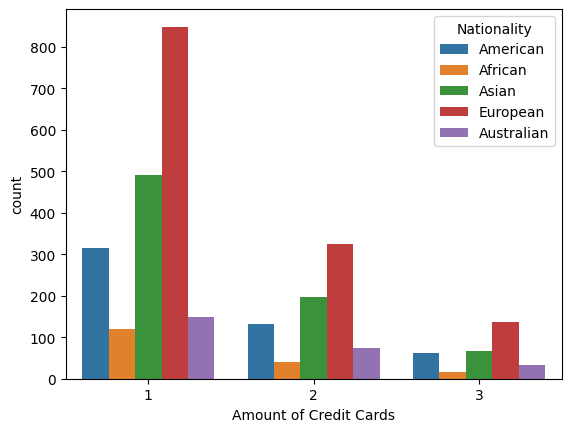

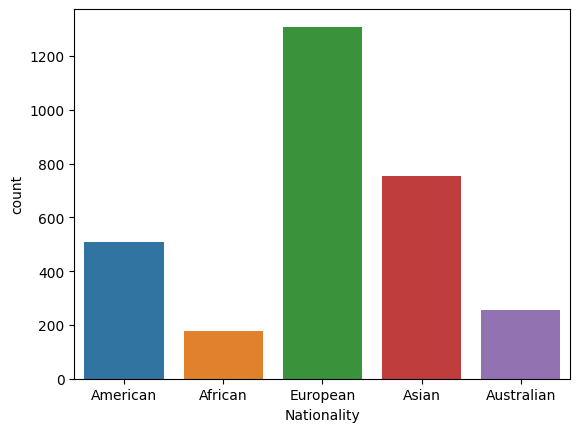

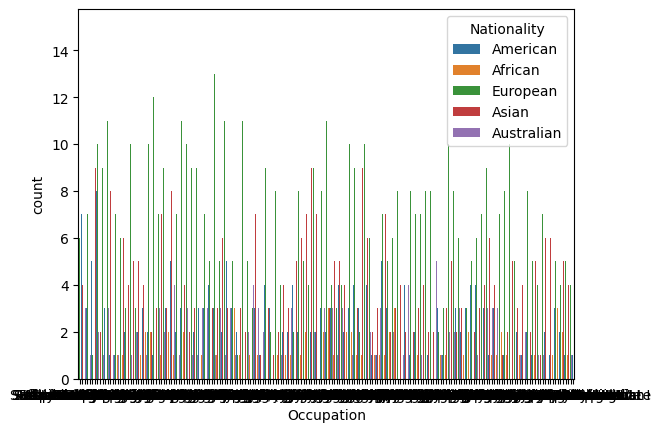

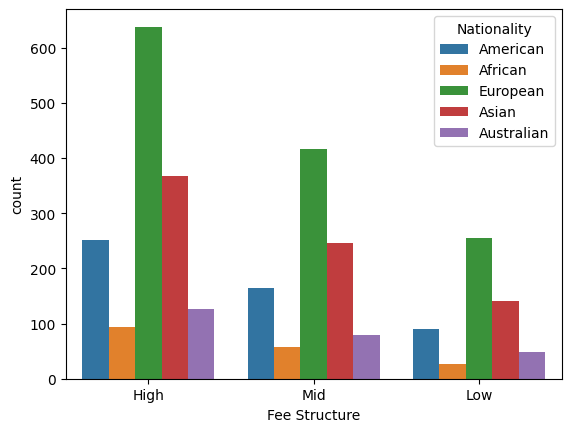

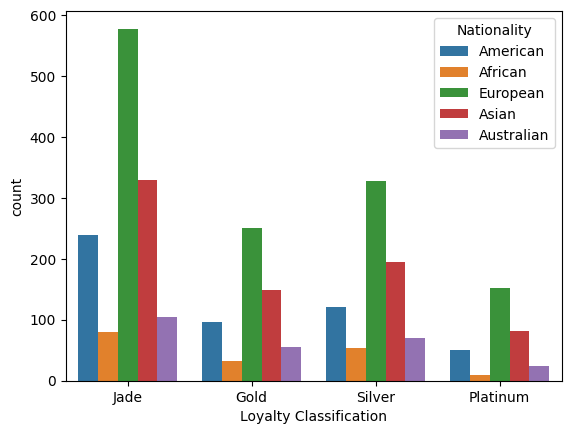

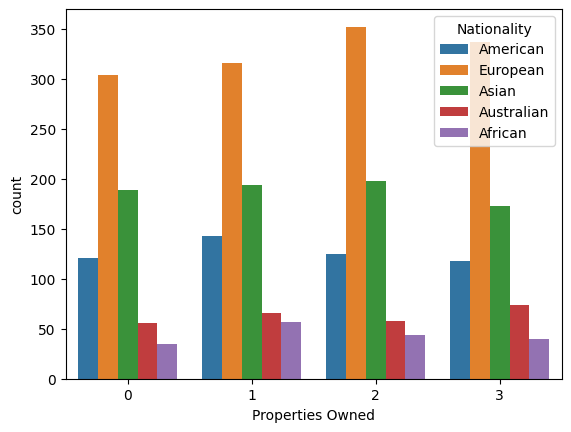

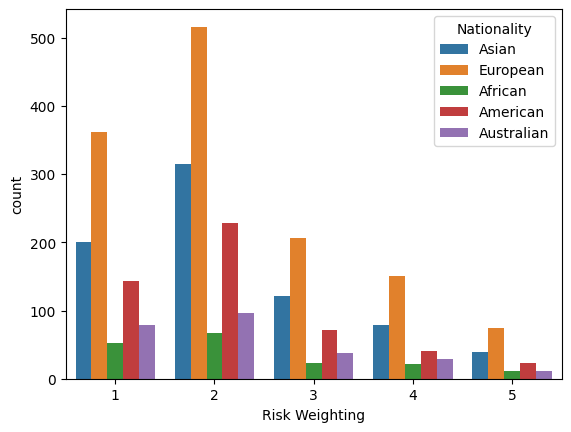

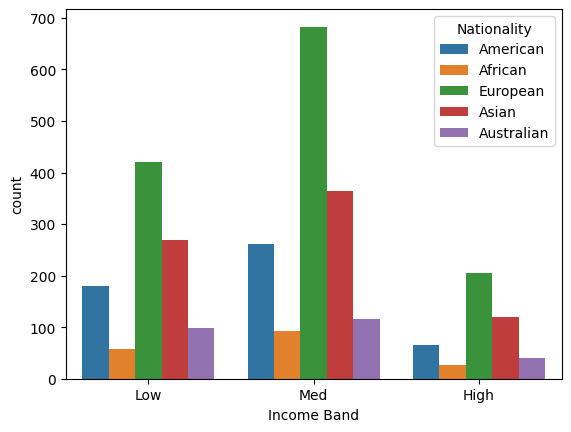

In [ ]:
for i,predictor in enumerate(df[[ "IAId", "BRId", "GenderId", "Amount of Credit Cards", "Nationality",
    "Occupation", "Fee Structure", "Loyalty Classification",
    "Properties Owned", "Risk Weighting", "Income Band"]]):
     plt.figure(i)
     sns.countplot(data=df,x=predictor,hue="Nationality")

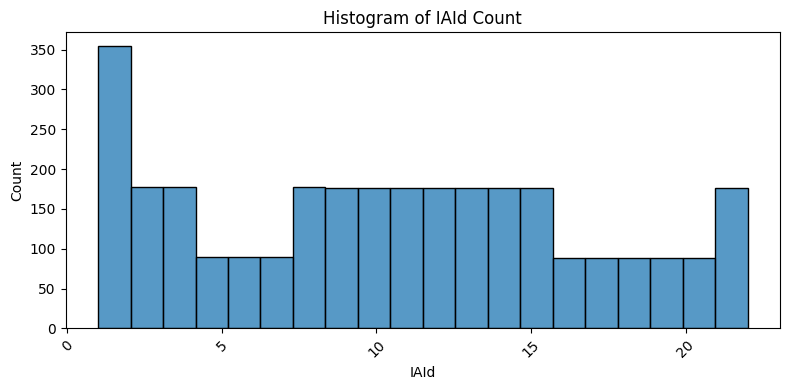

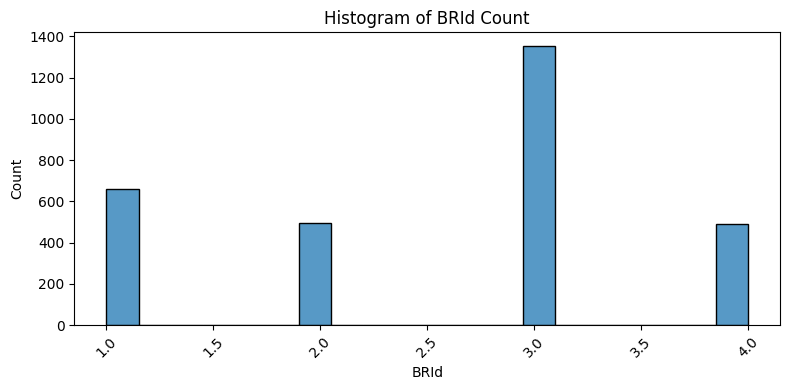

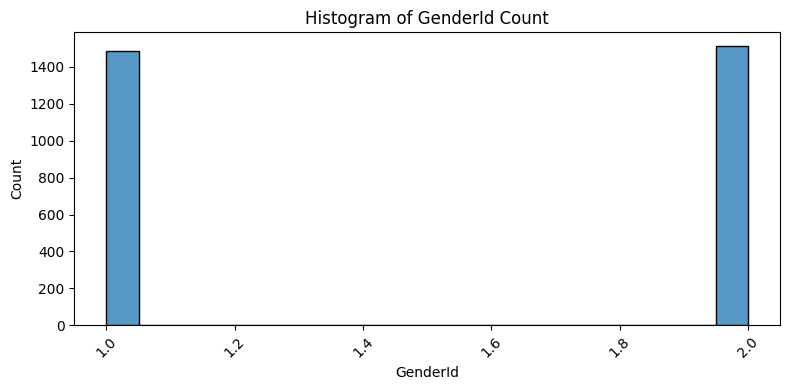

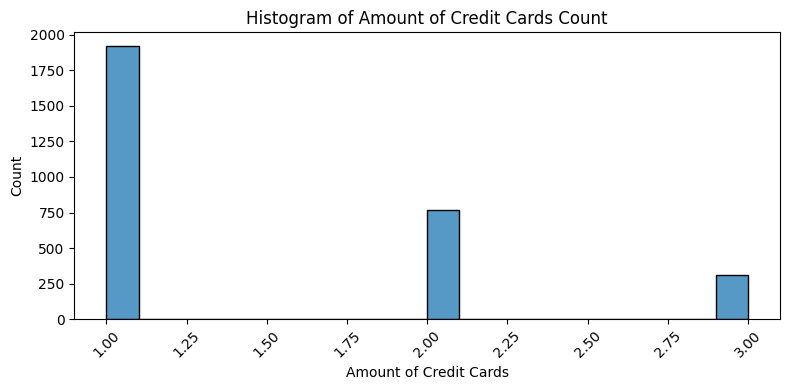

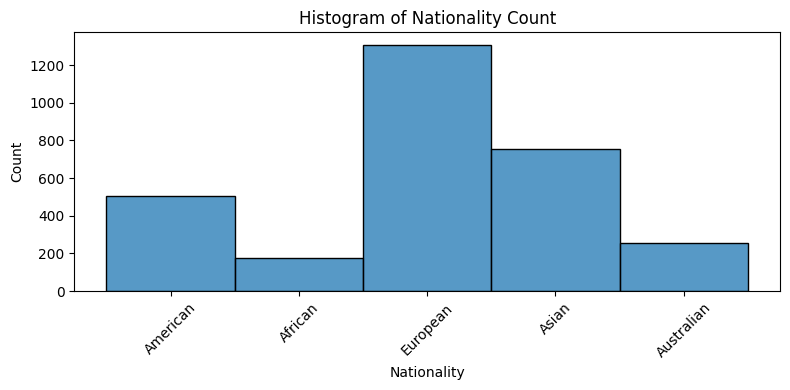

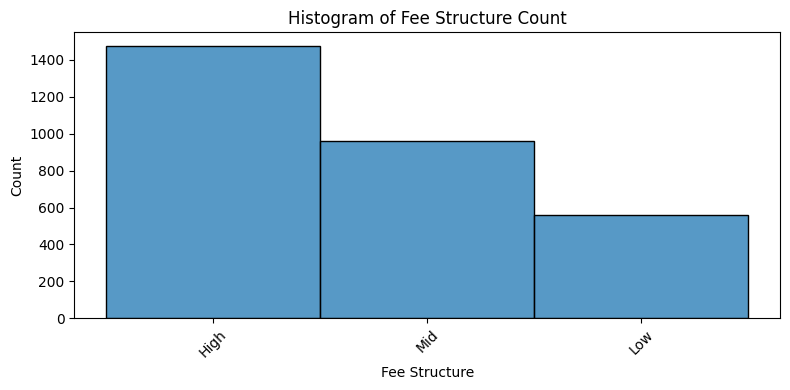

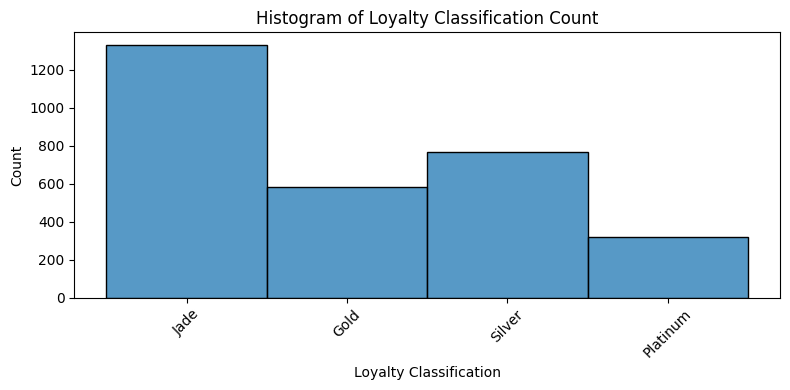

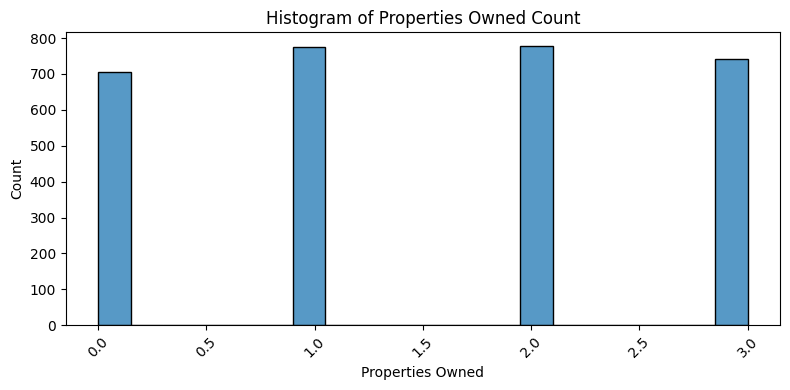

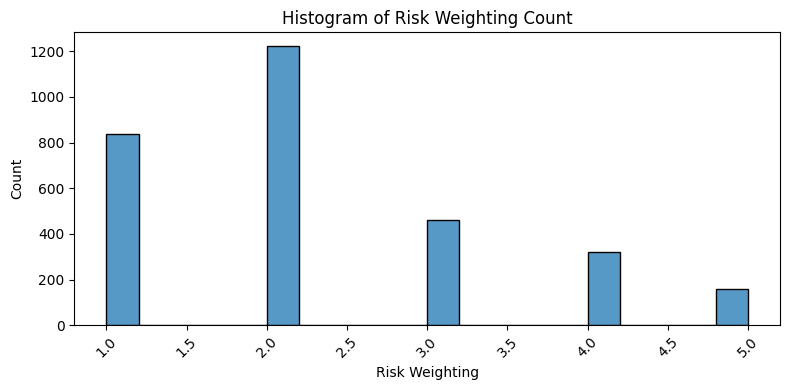

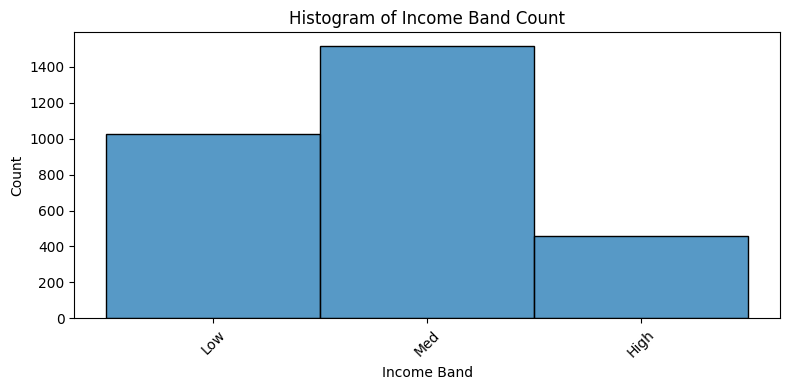

In [ ]:
for col in categorical_cols.columns:  # use .columns to get column names
    if col == "Occupation":  # corrected the typo from "Occupationn"
        continue

    plt.figure(figsize=(8, 4))  # correct way to set figure size
    sns.histplot(df[col], bins=20)  # you can also use countplot for categories
    plt.title(f"Histogram of {col} Count")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Numerical Analysis

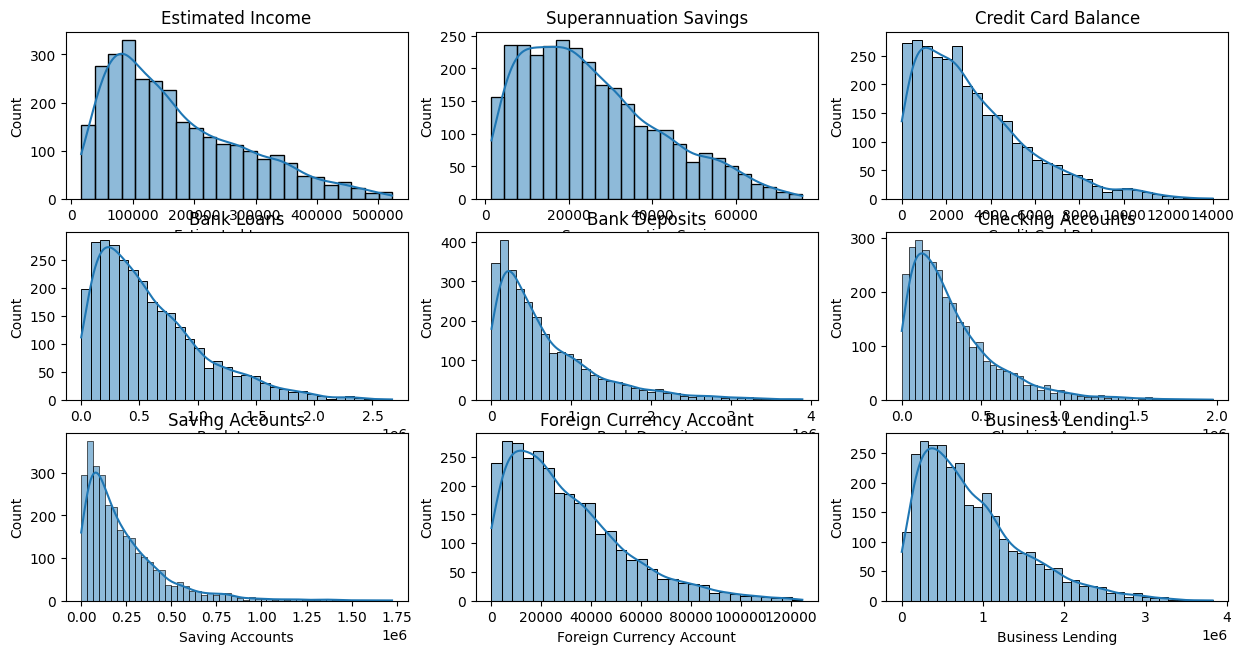

In [ ]:
numerical_cols=['Estimated Income','Superannuation Savings',
                'Credit Card Balance','Bank Loans','Bank Deposits','Checking Accounts','Saving Accounts'
                ,'Foreign Currency Account','Business Lending']

#Univariate Analysis

plt.figure(figsize=(15,10))
for i,col in enumerate(numerical_cols):

  plt.subplot(4,3,i+1)
  sns.histplot(df[col],kde=True)
  plt.title(col)
plt.show()


In [ ]:
#heatmaps

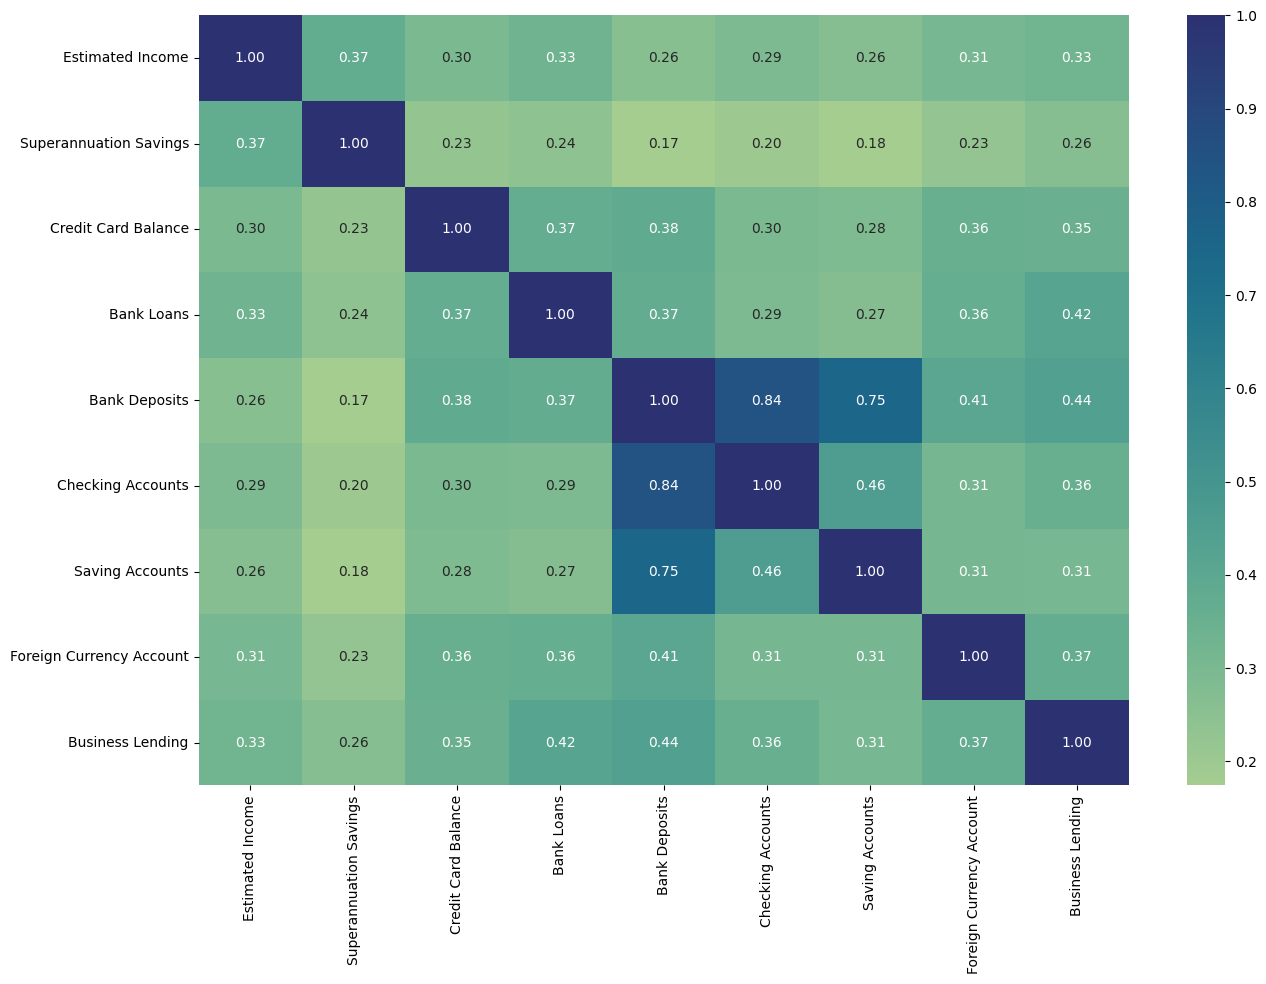

In [ ]:
correlation_matrix=df[numerical_cols].corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,cmap='crest',fmt='.2f')
plt.show()


Use gpt to gather insights from the heatmap

# Insights

1.